In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import akshare as ak

# 获取上证指数的历史数据
data = ak.stock_zh_index_daily(symbol="sh000001")

# 显示前五行数据
print(df.head())

# Step 2: Save to CSV file
data.to_csv("./data/sh000001.csv", index=False, encoding="utf-8-sig")

print("Data saved to sh000001.csv successfully.")


         date    open    high     low   close  volume
0  1990-12-19   96.05   99.98   95.79   99.98  126000
1  1990-12-20  104.30  104.39   99.98  104.39   19700
2  1990-12-21  109.07  109.13  103.73  109.13    2800
3  1990-12-24  113.57  114.55  109.13  114.55    3200
4  1990-12-25  120.09  120.25  114.55  120.25    1500
Data saved to sh000001.csv successfully.


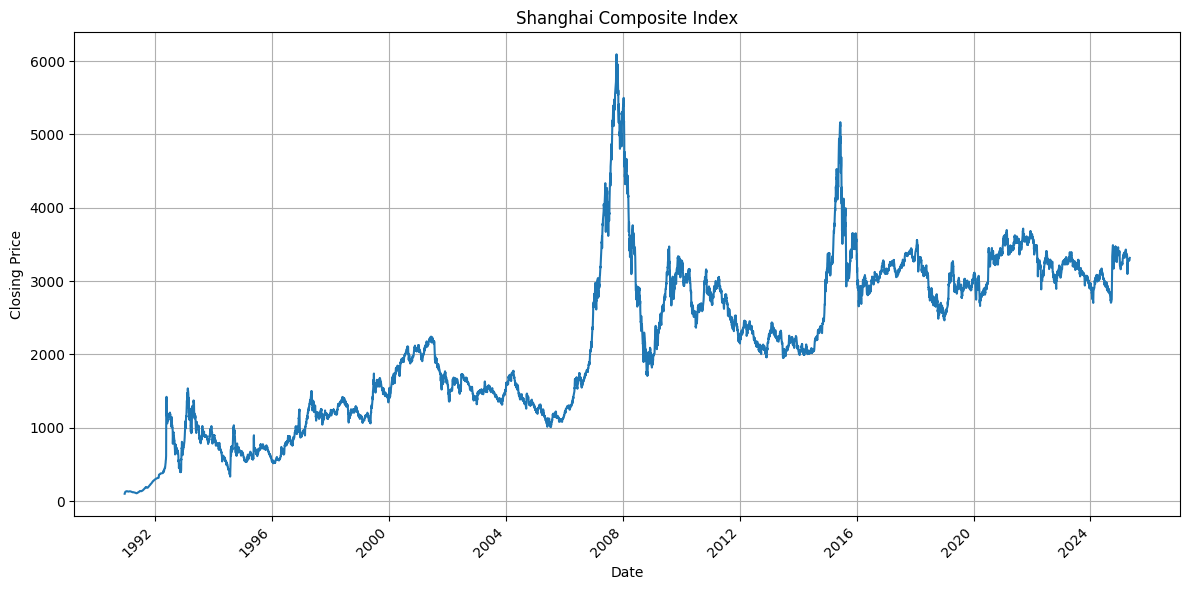

In [12]:
import pandas as pd

# Step 1: Load the CSV file
df = pd.read_csv("./data/sh000001.csv")

# Step 2: Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Step 3: (Optional) Set 'date' as index for easier plotting
df.set_index('date', inplace=True)

# Step 3: Plot with date on x-axis
df['close'].plot(title="Shanghai Composite Index", figsize=(12, 6))
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)

# Optional: Rotate date labels
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Date from 1990-12 to 2025-05
Total months: 414
Total years: 34.5
Total invested: ¥414000.00
Portfolio value: ¥1137348.89
Profit: ¥723348.89 (5.06%)


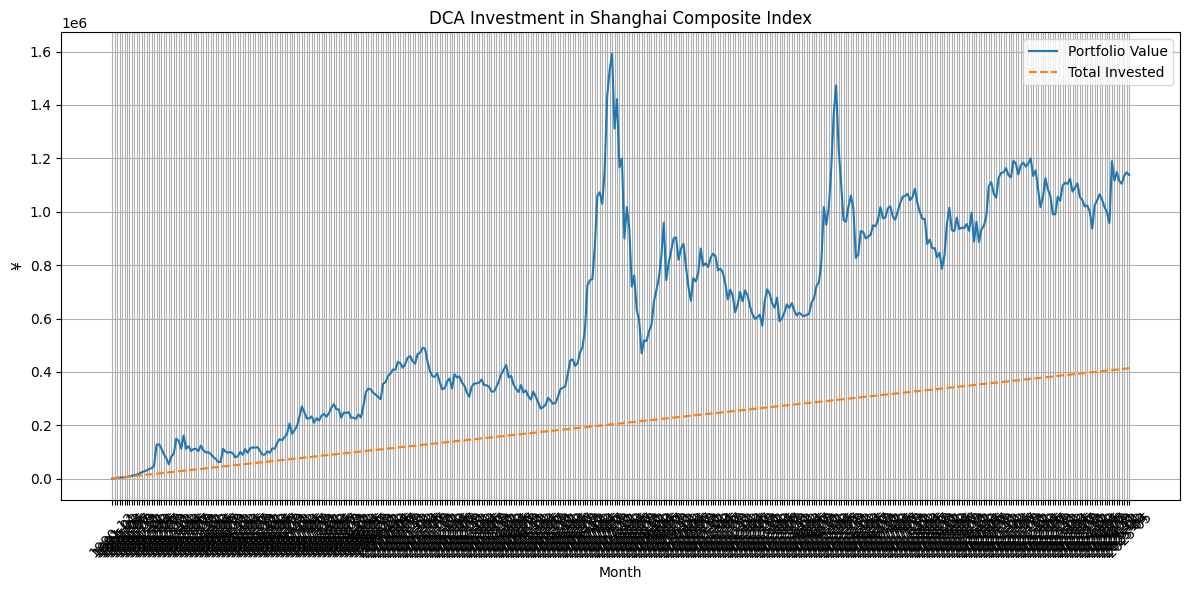

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("./data/sh000001.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Extract year-month for grouping
df['month'] = df['date'].dt.to_period('M')

# Get the first trading day of each month
monthly_df = df.groupby('month').first().reset_index()

# DCA logic
investment_per_month = 1000  # ¥1000 per month
monthly_df['shares_bought'] = investment_per_month / monthly_df['close']
monthly_df['total_shares'] = monthly_df['shares_bought'].cumsum()
monthly_df['total_invested'] = investment_per_month * (monthly_df.index + 1)

# Use latest price to calculate current value
# latest_price = df['close'].iloc[-1]
monthly_df['portfolio_value'] = monthly_df['total_shares'] * monthly_df['close']

# Final result
total_invested = monthly_df['total_invested'].iloc[-1]
portfolio_value = monthly_df['portfolio_value'].iloc[-1]
profit = portfolio_value - total_invested
total_month = monthly_df['month'].size
total_year = total_month/12

print(f"Date from {monthly_df['month'][0]} to {monthly_df['month'].iloc[-1]}")
print(f"Total months: {total_month}")
print(f"Total years: {total_year}")
print(f"Total invested: ¥{total_invested:.2f}")
print(f"Portfolio value: ¥{portfolio_value:.2f}")
print(f"Profit: ¥{profit:.2f} ({profit / total_invested / total_year:.2%})")

# Save to CSV
monthly_df.to_csv("./data/sh000001_months.csv", index=False, encoding="utf-8-sig")
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_df['month'].astype(str), monthly_df['portfolio_value'], label='Portfolio Value')
plt.plot(monthly_df['month'].astype(str), monthly_df['total_invested'], label='Total Invested', linestyle='--')
plt.title("DCA Investment in Shanghai Composite Index")
plt.xlabel("Month")
plt.ylabel("¥")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


Date from 1990 to 2025
Total years: 36
Total invested: ¥432000.00
Portfolio value: ¥1616335.34
Profit: ¥1184335.34 (7.62%)


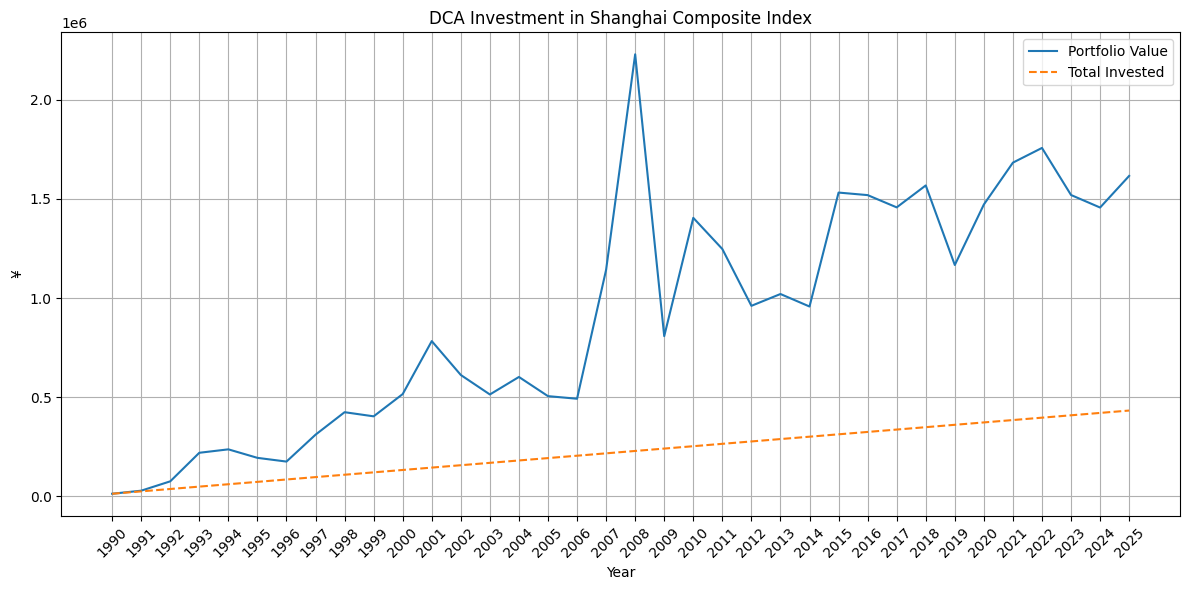

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("./data/sh000001.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Extract year for grouping
df['year'] = df['date'].dt.to_period('Y')

# Get the first trading day of each year
yearly_df = df.groupby('year').first().reset_index()


# DCA logic
investment_per_month = 12000  # ¥12000 per month
yearly_df['shares_bought'] = investment_per_month / yearly_df['close']
yearly_df['total_shares'] = yearly_df['shares_bought'].cumsum()
yearly_df['total_invested'] = investment_per_month * (yearly_df.index + 1)

# Use latest price to calculate current value
# latest_price = df['close'].iloc[-1]
yearly_df['portfolio_value'] = yearly_df['total_shares'] * yearly_df['close']

# Final result
total_invested = yearly_df['total_invested'].iloc[-1]
portfolio_value = yearly_df['portfolio_value'].iloc[-1]
profit = portfolio_value - total_invested
total_year = yearly_df['year'].size

print(f"Date from {yearly_df['year'][0]} to {yearly_df['year'].iloc[-1]}")
print(f"Total years: {total_year}")
print(f"Total invested: ¥{total_invested:.2f}")
print(f"Portfolio value: ¥{portfolio_value:.2f}")
print(f"Profit: ¥{profit:.2f} ({profit / total_invested / total_year:.2%})")

# Save to CSV
yearly_df.to_csv("./data/sh000001_years.csv", index=False, encoding="utf-8-sig")
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yearly_df['year'].astype(str), yearly_df['portfolio_value'], label='Portfolio Value')
plt.plot(yearly_df['year'].astype(str), yearly_df['total_invested'], label='Total Invested', linestyle='--')
plt.title("DCA Investment in Shanghai Composite Index")
plt.xlabel("Year")
plt.ylabel("¥")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

✅ Final Summary:
Total Invested: ¥264,000.00
Final Portfolio Value: ¥272,087.70
Remaining Cash (from sells): ¥543,631.74


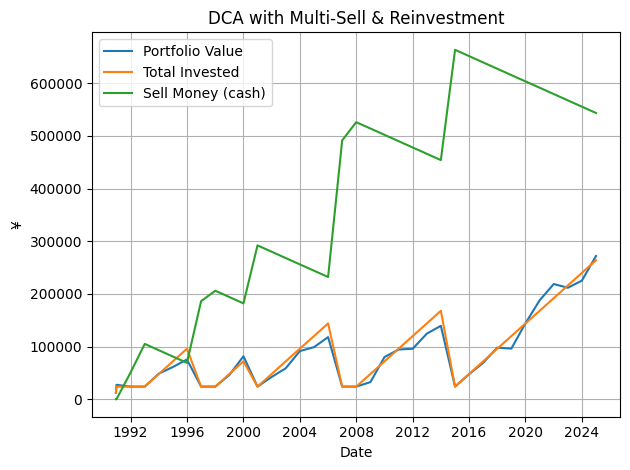

In [ ]:
# add sell 
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("./data/sh000001.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Group to yearly first date
df['year'] = df['date'].dt.to_period('Y')
yearly_df = df.groupby('year').first().reset_index()

# Setup parameters
investment_per_year = 12000
target_return = 0.3

# Initialize variables
total_shares = 0
total_invested = 0
sell_money = 0

results = []

for i, row in yearly_df.iterrows():
    price = row['close']
    date = row['date']

    # Calculate portfolio value before new investment
    portfolio_value = total_shares * price
    return_pct = (portfolio_value - total_invested) / total_invested if total_invested > 0 else 0

    # 🔁 Check and trigger sell if return exceeds target
    if return_pct > target_return:
        sell_money += portfolio_value  # collect profit
        total_shares = 0               # reset position
        portfolio_value = 0
        total_invested = 0             # reset invested to track next cycle

    # Prepare investment for this year
    invest_amount = investment_per_year
    if sell_money > 0:
        extra = min(12000, sell_money)
        invest_amount += extra
        sell_money -= extra

    # Buy new shares
    shares_bought = invest_amount / price
    total_shares += shares_bought
    total_invested += invest_amount
    portfolio_value = total_shares * price
    return_pct = (portfolio_value - total_invested) / total_invested if total_invested > 0 else 0

    # Record the state
    results.append({
        "date": date,
        "close": price,
        "invest_amount": invest_amount,
        "shares_bought": shares_bought,
        "total_shares": total_shares,
        "total_invested": total_invested,
        "portfolio_value": portfolio_value,
        "return_pct": return_pct,
        "sell_money_remaining": sell_money
    })

# Build DataFrame
final_df = pd.DataFrame(results)

# Save to CSV
final_df.to_csv("./data/sh000001_years_sell.csv", index=False, encoding="utf-8-sig")

# 📊 Summary
print("✅ Final Summary:")
print(f"Total Invested: ¥{final_df['total_invested'].iloc[-1]:,.2f}")
print(f"Final Portfolio Value: ¥{final_df['portfolio_value'].iloc[-1]:,.2f}")
print(f"Remaining Cash (from sells): ¥{final_df['sell_money_remaining'].iloc[-1]:,.2f}")

# 📈 Plot
plt.plot(final_df['date'], final_df['portfolio_value'], label='Portfolio Value')
plt.plot(final_df['date'], final_df['total_invested'], label='Total Invested')
plt.plot(final_df['date'], final_df['sell_money_remaining'], label='Sell Money (cash)')
plt.title("DCA with Multi-Sell & Reinvestment")
plt.xlabel("Date")
plt.ylabel("¥")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# Get Gold，现金， 债券 and modify the percentage by year and month

import akshare as ak

df = ak.fund_etf_spot_em()

df.to_csv("./data/etf.csv", index=False, encoding="utf-8-sig")





  0%|          | 0/11 [00:00<?, ?it/s]